# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rayhan Ahmad Rizalullah
- **Email:** ray.ahmdr@gmail.com
- **ID Dicoding:** rayhanahmadr

## Menentukan Pertanyaan Bisnis

1. Apa hari dengan penyewa casual terbanyak?
2. Apa musim dengan penyewa sepeda paling sedikit?
3. Bagaimana tren peminjaman sepeda berubah sepanjang hari dari pagi hingga malam?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Mambaca day.csv dan hour.csv

In [2]:
day_df = pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Periksa apakah ada value yang null

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Periksa jumlah data yang duplikat

In [6]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Periksa apakah ada value yang null

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Periksa jumlah data yang duplikat

In [10]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Mengubah Dtype kolom "dteday" dari object menjadi datetime pada dataframe day_df dan hour_df

In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

## Exploratory Data Analysis (EDA)

### Eksplorasi DataFrame day_df dan hour_df

In [13]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


#### Berdasarkan hari:

In [14]:
day_df.groupby(by=["weekday"]).agg({
    "casual":"mean",
    "registered":"mean",
})

,casual,registered
weekday,,
0,1338.295238,2890.533333
1,674.133333,3663.990476
2,556.182692,3954.480769
3,551.144231,3997.394231
4,590.961538,4076.298077
5,752.288462,3938.000000
6,1465.257143,3085.285714


#### Berdasarkan musim:

In [15]:
# Membuat kamus untuk memetakan angka musim ke label yang sesuai
nama_musim = {
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
}

# Menghitung rata-rata jumlah peminjaman sepeda berdasarkan musim
mean_cnt_per_season = day_df.groupby(by="season").cnt.mean()

# Mengganti indeks angka musim dengan label musim yang sesuai
mean_cnt_per_season.index = mean_cnt_per_season.index.map(nama_musim)

# Menampilkan hasil
print(mean_cnt_per_season)

season
Musim Semi      2604.132597
Musim Panas     4992.331522
Musim Gugur     5644.303191
Musim Dingin    4728.162921
Name: cnt, dtype: float64


#### Berdasarkan periode waktu:

In [16]:
# Membuat fungsi untuk mengkategorikan waktu
def categorize_time(hour):
    if hour >= 5 and hour < 11:
        return "Pagi"
    elif hour >= 11 and hour < 15:
        return "Siang"
    elif hour >= 15 and hour < 18:
        return "Sore"
    else:
        return "Malam"

# Menambahkan kolom "time_category" yang berisi kategori waktu
hour_df['time_category'] = hour_df['hr'].apply(categorize_time)

# Melakukan groupby berdasarkan kategori waktu dan menghitung jumlah peminjaman sepeda
time_category_counts = hour_df.groupby('time_category')['cnt'].mean()

# Menampilkan hasil
time_category_counts


time_category
Malam    136.035953
Pagi     177.071264
Siang    239.033642
Sore     341.597533
Name: cnt, dtype: float64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa hari dengan penyewa casual terbanyak?

Untuk menjawab pertanyaan ini, akan dibuat stacked bar chart antara penyewa registered dengan casual.

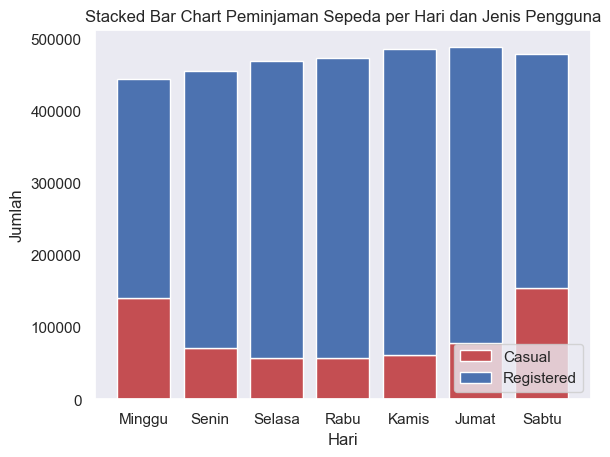

In [17]:
nama_hari = {
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu'
}

group_weekday = day_df.groupby(by="weekday")
days = group_weekday.weekday.first().tolist()

registered_counts = group_weekday.registered.sum().tolist()
casual_counts = group_weekday.casual.sum().tolist()

# Membuat stacked bar chart
plt.bar([nama_hari[day] for day in days], casual_counts, label='Casual', color='r')
plt.bar([nama_hari[day] for day in days], registered_counts, bottom=casual_counts, label='Registered', color='b')

plt.xlabel('Hari')
plt.ylabel('Jumlah')
plt.title('Stacked Bar Chart Peminjaman Sepeda per Hari dan Jenis Pengguna')
plt.legend(loc='lower right')

plt.show()


Dibandingkan hari-hari lainnya, hari Sabtu dan Minggu memiliki penyewa casual lebih banyak dan penyewa registered lebih sedikit.

### Pertanyaan 2: Apa musim dengan penyewa sepeda paling sedikit?

Untuk menjawab pertanyaan ini, akan dibuat pie chart untuk masing-masing musim

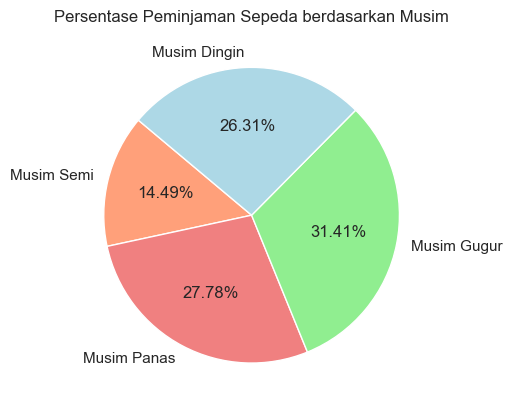

In [18]:
# Data yang akan diplot
labels = mean_cnt_per_season.index
sizes = mean_cnt_per_season.values
colors = ['lightsalmon', 'lightcoral', 'lightgreen','lightblue']

# Membuat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)

# Menambahkan judul
plt.title('Persentase Peminjaman Sepeda berdasarkan Musim')

# Menampilkan pie chart
plt.show()

- Musim gugur menjadi musim dengan penyewa sepeda paling banyak,
- Sedangkan, musim semi menjadi musim penyewa dengan sepeda paling sedikit.

### Pertanyaan 3: Bagaimana tren peminjaman sepeda berubah sepanjang hari dari pagi hingga malam?

Untuk menjawab pertanyaan ini, akan dibuat line chart untuk masing-masing musim

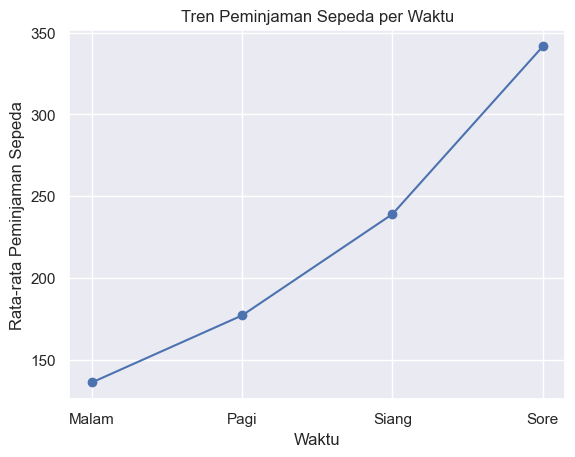

In [19]:
plt.plot(time_category_counts.index, time_category_counts.values, marker='o')

# Menambahkan label dan judul
plt.xlabel('Waktu')
plt.ylabel('Rata-rata Peminjaman Sepeda')
plt.title('Tren Peminjaman Sepeda per Waktu')

# Menampilkan grid
plt.grid(True)

# Menampilkan line chart
plt.show()


Tren penyewa sepeda sepanjang hari meningkat, dengan puncaknya pada sore hari.

## Conclusion

1.  Apa hari dengan penyewa casual terbanyak?

    Berdasarkan stacked bar chart di atas, hari Sabtu dan Minggu memiliki jumlah penyewa casual yang paling tinggi dibandingkan dengan hari-hari lainnya. Oleh karena itu, strategi pemasaran dan promosi yang tepat dapat diimplementasikan untuk meningkatkan jumlah penyewa terdaftar pada hari-hari ini. Misalnya, dengan memberikan diskon khusus bagi penyewa terdaftar pada akhir pekan, mengadakan acara khusus atau tur bagi anggota terdaftar pada hari Sabtu atau Minggu, atau menyediakan penawaran paket langganan yang menarik untuk mendorong lebih banyak orang untuk mendaftar sebagai anggota tetap.

2.  Apa musim dengan penyewa sepeda paling sedikit?

    Berdasarkan pie chart di atas, musim semi adalah musim yang mempunyai jumlah penyewa sepeda yang paling sedikit dibandingkan musim lain. Oleh karena itu, kampanye promosi dan pemasaran dapat dilakukan pada musim ini dengan fokus pada memperkenalkan penawaran khusus, diskon, atau paket promosi untuk menarik lebih banyak pelanggan. Misalnya, penawaran diskon spesial atau program referensi teman (referral) kepada pelanggan yang menyewa sepeda selama musim semi, atau mengadakan acara-acara promosi khusus yang berorientasi pada musim semi seperti tur bersepeda atau festival sepeda.

3.  Bagaimana tren peminjaman sepeda berubah sepanjang hari dari pagi hingga malam?

    Tren peminjaman sepeda cenderung meningkat sepanjang hari dengan puncaknya terjadi pada sore hari, seperti yang terlihat pada line chart di atas. Hal ini menunjukkan bahwa seiring berjalannya waktu dari pagi hingga malam, jumlah peminjaman sepeda secara umum mengalami peningkatan. Pada pagi hari, jumlah peminjaman sepeda masih relatif rendah, kemudian mulai meningkat secara signifikan saat siang dan mencapai puncaknya pada sore hari. Setelah sore hari, jumlah peminjaman sepeda cenderung mulai menurun menjelang malam hari. Hal ini mungkin disebabkan oleh perubahan aktivitas dan pola perjalanan pengguna, seperti perjalanan pulang kerja atau kegiatan rekreasi sore hari.